# Imports

In [1]:
import pandas as pd 
import numpy as np
import requests
import io
import re
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [2]:
BASE_URL = "https://docs.google.com/spreadsheets/d/1VpLXByvbTfbgupDNWcUaBxdk72cW9FRExs0AgRVaF1g/export?format=csv&"
URL_PARTICIPANTS = BASE_URL+"gid=611260429"
URL_POSTURES = BASE_URL+"gid=961690077"
content_participants = requests.get(URL_PARTICIPANTS, verify=False).content
content_postures = requests.get(URL_POSTURES, verify=False).content
df_participants = pd.read_csv(io.StringIO(content_participants.decode('utf-8'))) 
df_postures = pd.read_csv(io.StringIO(content_postures.decode('utf-8'))) 
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [3]:
df_participants.head(1)

,ParticipantID,Age,Gender,DominantHand,AvgTimeSpent,WordsPerMinute,WordCount,Errors,TimeTakenS,TimeTakenM,MeanError,totalwords,time,sec
0,participant_1,27.0,Male,Right,10.0,57.0,89.0,15.0,94.0,1.561404,9.606742,104.0,1.561404,93.684211


In [4]:
df_postures.head(1)

,ParticipantID,Comfort_Below_Left_Fist_0,Preference_Below_Left_Fist_0,Comfort_Below_Right_Fist_0,Preference_Below_Right_Fist_0,Comfort_Below_Left_Fist_90,Preference_Below_Left_Fist_90,Comfort_Below_Right_Fist_90,Preference_Below_Right_Fist_90,Comfort_Below_Left_Fist_180,Preference_Below_Left_Fist_180,Comfort_Below_Right_Fist_180,Preference_Below_Right_Fist_180,Comfort_Below_Left_Palm_0,Preference_Below_Left_Palm_0,Comfort_Below_Right_Palm_0,Preference_Below_Right_Palm_0,Comfort_Below_Left_Palm_90,Preference_Below_Left_Palm_90,Comfort_Below_Right_Palm_90,Preference_Below_Right_Palm_90,Comfort_Below_Left_Palm_180,Preference_Below_Left_Palm_180,Comfort_Below_Right_Palm_180,Preference_Below_Right_Palm_180,Comfort_On_Left_Fist_0,Preference_On_Left_Fist_0,Comfort_On_Right_Fist_0,Preference_On_Right_Fist_0,Comfort_On_Left_Fist_90,Preference_On_Left_Fist_90,Comfort_On_Right_Fist_90,Preference_On_Right_Fist_90,Comfort_On_Left_Fist_180,Preference_On_Left_Fist_180,Comfort_On_Right_Fist_180,Preference_On_Right_Fist_180,Comfort_On_Left_Palm_0,Preference_On_Left_Palm_0,Comfort_On_Right_Palm_0,Preference_On_Right_Palm_0,Comfort_On_Left_Palm_90,Preference_On_Left_Palm_90,Comfort_On_Right_Palm_90,Preference_On_Right_Palm_90,Comfort_On_Left_Palm_180,Preference_On_Left_Palm_180,Comfort_On_Right_Palm_180,Preference_On_Right_Palm_180,Comfort_Beside_Left_Fist_0,Preference_Beside_Left_Fist_0,Comfort_Beside_Right_Fist_0,Preference_Beside_Right_Fist_0,Comfort_Beside_Left_Fist_90,Preference_Beside_Left_Fist_90,Comfort_Beside_Right_Fist_90,Preference_Beside_Right_Fist_90,Comfort_Beside_Left_Fist_180,Preference_Beside_Left_Fist_180,Comfort_Beside_Right_Fist_180,Preference_Beside_Right_Fist_180,Comfort_Beside_Left_Palm_0,Preference_Beside_Left_Palm_0,Comfort_Beside_Right_Palm_0,Preference_Beside_Right_Palm_0,Comfort_Beside_Left_Palm_90,Preference_Beside_Left_Palm_90,Comfort_Beside_Right_Palm_90,Preference_Beside_Right_Palm_90,Comfort_Beside_Left_Palm_180,Preference_Beside_Left_Palm_180,Comfort_Beside_Right_Palm_180,Preference_Beside_Right_Palm_180
0,participant_1,3,2,4,4,2,2,4,4,1,1,2,2,3,3,5,5,3,3,4,4,1,1,2,2,2,2,4,4,1,1,4,4,1,1,2,2,3,3,4,4,2,2,4,4,1,1,1,1,2,2,3,3,2,2,4,4,1,1,1,1,3,3,4,4,3,3,4,4,1,1,1,1


# Analysis

## Participants

In [5]:
# GENDER DISTRIBUTION
df_participants.Gender.value_counts()

Male      20
Female    10
Name: Gender, dtype: int64

In [6]:
# AVERAGE AGE
print("MEAN: ",df_participants["Age"].mean())
print("STD: ",df_participants["Age"].std())

MEAN:  24.566666666666666
STD:  2.4023455970813385


In [7]:
# AVERAGE USAGE
print("MEAN: ",df_participants["AvgTimeSpent"].mean())
print("STD: ",df_participants["AvgTimeSpent"].std())

MEAN:  7.0
STD:  3.723179953415795


In [8]:
# AVERAGE TYPING SPEED
print("MEAN: ",df_participants["WordsPerMinute"].mean())
print("STD: ",df_participants["WordsPerMinute"].std())

MEAN:  34.9
STD:  9.531617078855561


In [9]:
# AVERAGE ERROR RATE
print("MEAN: ",df_participants["MeanError"].mean())
print("STD: ",df_participants["MeanError"].std())

MEAN:  5.735205992738709
STD:  2.6533760931418673


## Postures

In [10]:
pd.melt(df_postures, id_vars=['ParticipantID'], var_name='posture', value_name='score').tail()

,ParticipantID,posture,score
2155,participant_26,Preference_Beside_Right_Palm_180,2
2156,participant_27,Preference_Beside_Right_Palm_180,4
2157,participant_28,Preference_Beside_Right_Palm_180,2
2158,participant_29,Preference_Beside_Right_Palm_180,1
2159,participant_30,Preference_Beside_Right_Palm_180,3


In [11]:
# creating a blank series 
surface_list = pd.Series([]) 
orientation_list = pd.Series([]) 
form_list = pd.Series([]) 
dexterity_list = pd.Series([]) 
rating_list = pd.Series([]) 

df_postures_stats = pd.melt(df_postures, id_vars=['ParticipantID'], var_name='posture', value_name='score')
participant_handedness={
    "participant_1":"Right",
    "participant_2":"Right",
    "participant_3":"Right",
    "participant_4":"Left",
    "participant_5":"Right",
    "participant_6":"Left",
    "participant_7":"Right",
    "participant_8":"Left",
    "participant_9":"Right",
    "participant_10":"Right",
    "participant_11":"Right",
    "participant_12":"Right",
    "participant_13":"Right",
    "participant_14":"Right",
    "participant_15":"Right",
    "participant_16":"Right",
    "participant_17":"Right",
    "participant_18":"Left",
    "participant_19":"Left",
    "participant_20":"Right",
    "participant_21":"Right",
    "participant_22":"Right",
    "participant_23":"Right",
    "participant_24":"Right",
    "participant_25":"Right",
    "participant_26":"Right",
    "participant_27":"Right",
    "participant_28":"Right",
    "participant_29":"Right",
    "participant_30":"Right",
}
for i in range(len(df_postures_stats)): 
  independent_variable = df_postures_stats["posture"][i].split("_")
  rating_list[i] = independent_variable[0]
  surface_list[i] = independent_variable[1]
#   print(df_postures_stats["ParticipantID"][i])
  dexterity_list[i] = "Dominant" if independent_variable[2] == participant_handedness[df_postures_stats["ParticipantID"][i]] else "Non Dominant"
  form_list[i] = "Close" if independent_variable[3] == "Fist" else "Open"
  orientation_list[i] = independent_variable[4]

  
df_postures_stats.insert(3, "surface", surface_list)
df_postures_stats.insert(4, "dexterity", dexterity_list)
df_postures_stats.insert(5, "form", form_list)
df_postures_stats.insert(6, "orientation", orientation_list)
df_postures_stats.insert(7, "rating", rating_list)
df_postures_stats["posture"] = df_postures_stats["posture"].map(lambda x: x.lstrip('Comfort_').lstrip('Preference_')) #[i.replace("Comfort_|Preference_","") for i in df_postures_stats["posture"]]
df_postures_stats.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating
0,participant_1,Below_Left_Fist_0,3,Below,Non Dominant,Close,0,Comfort
1,participant_2,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
2,participant_3,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
3,participant_4,Below_Left_Fist_0,4,Below,Dominant,Close,0,Comfort
4,participant_5,Below_Left_Fist_0,2,Below,Non Dominant,Close,0,Comfort


In [12]:
df_postures_stats_melted = pd.melt(df_postures_stats,id_vars=["ParticipantID","surface","score","orientation","dexterity","form", "rating"]).groupby("value").apply(lambda x: (x.sort_values('score', ascending=False)))
print(df_postures_stats_melted.head())
# print(df_orientation_postures_stats.head())
# print(df_handform_postures_stats.head())
# print(df_dexterity_postures_stats.head())


                       ParticipantID surface  ...  variable              value
value                                         ...                             
Below_Left_Fist_0 20  participant_21   Below  ...   posture  Below_Left_Fist_0
                  12  participant_13   Below  ...   posture  Below_Left_Fist_0
                  42  participant_13   Below  ...   posture  Below_Left_Fist_0
                  35   participant_6   Below  ...   posture  Below_Left_Fist_0
                  45  participant_16   Below  ...   posture  Below_Left_Fist_0

[5 rows x 9 columns]


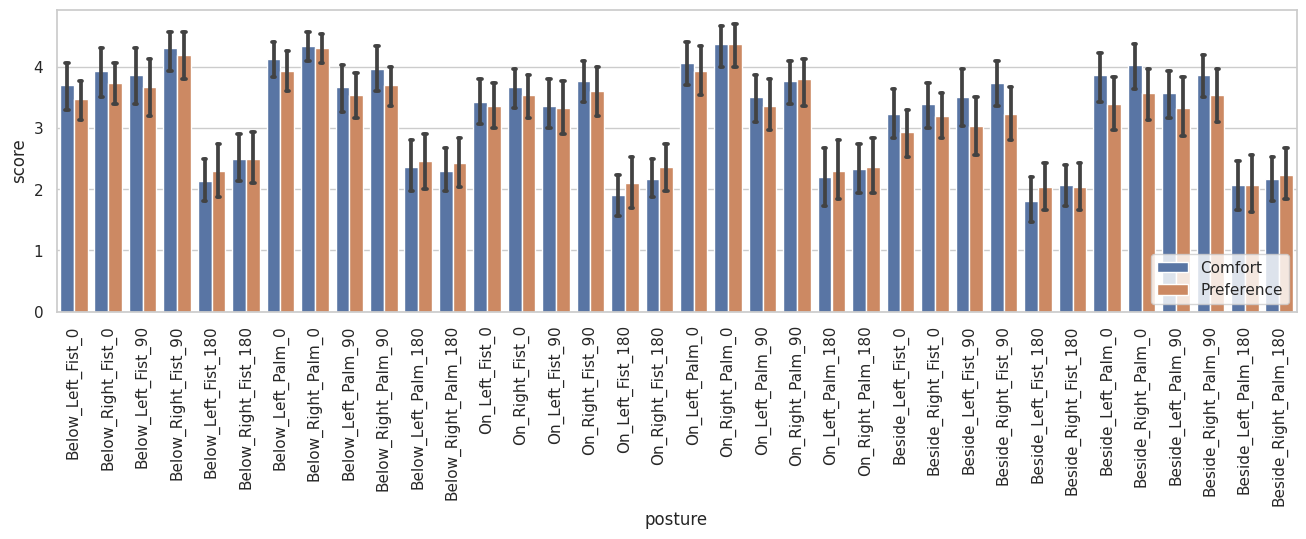

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x="posture", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')

comfort 
             score
surface          
Below    3.433333
Beside   3.108333
On       3.211111
-----
preference 
             score
surface          
Below    3.352778
Beside   2.883333
On       3.202778


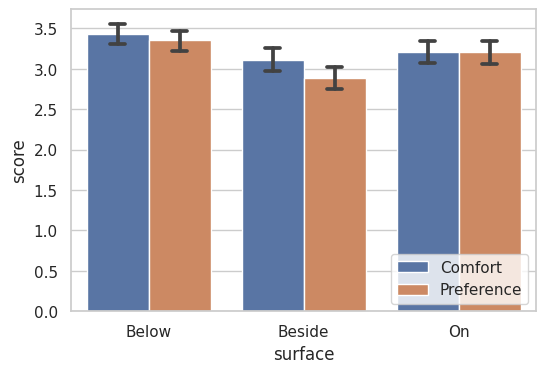

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="surface", y="score", hue="rating", data=df_postures_stats, capsize=0.1, order= ["Below", "Beside", "On"])
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("surface").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("surface").mean())

comfort 
                 score
orientation          
0            3.847222
180          2.166667
90           3.738889
-----
preference 
                 score
orientation          
0            3.644444
180          2.266667
90           3.527778


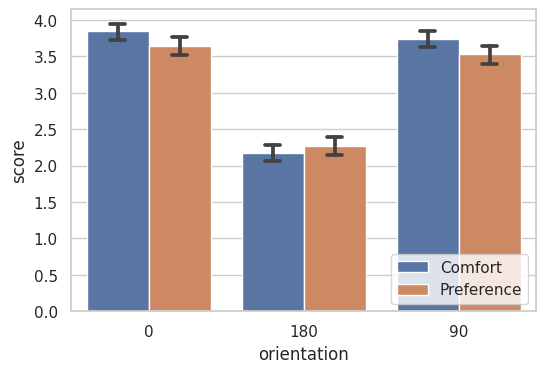

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="orientation", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("orientation").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("orientation").mean())

comfort 
                  score
dexterity             
Dominant      3.329630
Non Dominant  3.172222
-----
preference 
                  score
dexterity             
Dominant      3.218519
Non Dominant  3.074074


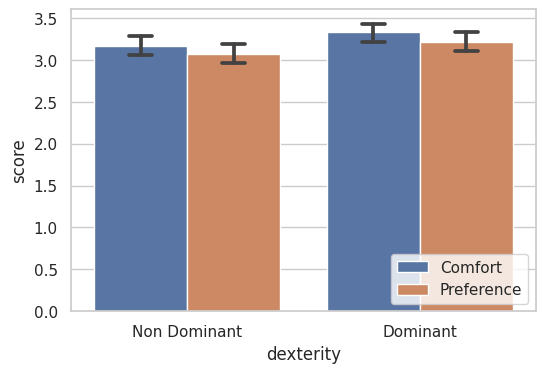

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="dexterity", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("dexterity").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("dexterity").mean())

comfort 
           score
form           
Close  3.137037
Open   3.364815
-----
preference 
           score
form           
Close  3.035185
Open   3.257407


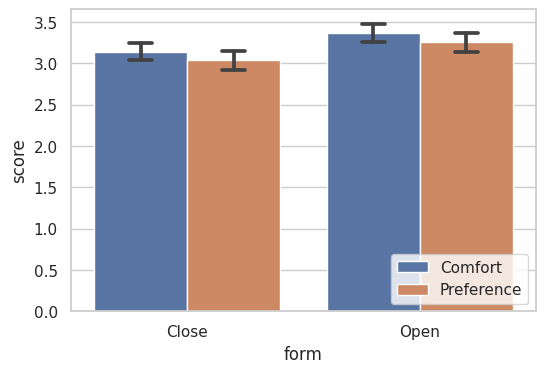

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("form").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("form").mean())

**To do**

- ~Compare postures across different dimensions (SURFACE, WRIST_ORIENTATION, HAND_FORM & DEXTERITY)~
- Give design recomendations based on above^^

In [18]:
# "Preference_Beside_Right_Fist_Side"
# df_postures_stats.loc[(df_postures_stats["ParticipantID"] == "participant_4") & (df_postures_stats["posture"] == "Beside_Right_Fist_90")]
# df_postures_stats.head()
df_postures_stats.loc[(df_postures_stats["score"].isnull())]

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating


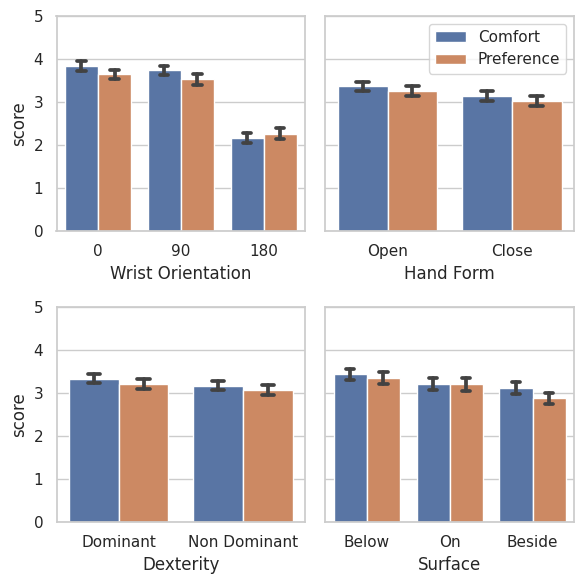

In [34]:
sns.set(style="whitegrid")

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
# sns.despine(top=True, right=True)
# sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Generate a random univariate dataset
# d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
# sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0])
ax1 = sns.barplot(x="orientation", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0], order=["0","90", "180"])
ax2 = sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 1], order=["Open","Close"])
ax3 = sns.barplot(x="dexterity", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 0], order=["Dominant","Non Dominant"])
ax4 = sns.barplot(x="surface", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 1], order=["Below","On", "Beside"])

ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)
ax3.get_legend().set_visible(False)
ax4.get_legend().set_visible(False)
ax2.set_ylabel('') 
ax4.set_ylabel('') 

ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

ax1.set_xlabel('Wrist Orientation') 
ax2.set_xlabel('Hand Form') 
ax3.set_xlabel('Dexterity') 
ax4.set_xlabel('Surface') 

plt.setp(axes, yticks=[0,1,2,3,4,5])
plt.tight_layout()

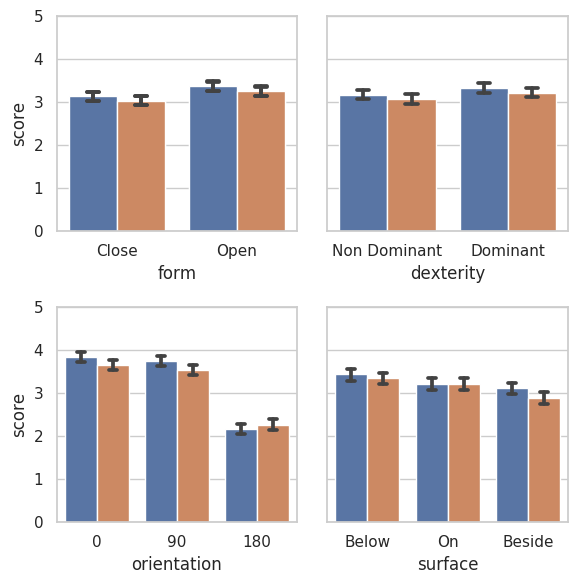

In [ ]:
sns.set(style="whitegrid")

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
# sns.despine(top=True, right=True)
# sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Generate a random univariate dataset
# d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0])
ax1 = sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0])
ax2 = sns.barplot(x="dexterity", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 1])
ax3 = sns.barplot(x="orientation", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 0], order=["0","90", "180"])
ax4 = sns.barplot(x="surface", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 1])

ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)
ax3.get_legend().set_visible(False)
ax4.get_legend().set_visible(False)
ax2.set_ylabel('') 
ax4.set_ylabel('') 

plt.setp(axes, yticks=[0,1,2,3,4,5])
plt.tight_layout()

In [ ]:
df_postures_stats.to_csv('df_postures_stats.csv') 
files.download('df_postures_stats.csv')

In [ ]:
df_postures_stats['ParticipantID'] = [c.replace("participant_","") for c in df_postures_stats['ParticipantID'].astype(str)]
df_postures_stats.head()

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating
0,1,Below_Left_Fist_0,3,Below,Non Dominant,Close,0,Comfort
1,2,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
2,3,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
3,4,Below_Left_Fist_0,4,Below,Dominant,Close,0,Comfort
4,5,Below_Left_Fist_0,2,Below,Non Dominant,Close,0,Comfort


In [ ]:
df_postures_stats.head()

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating
0,1,Below_Left_Fist_0,3,Below,Non Dominant,Close,0,Comfort
1,2,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
2,3,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
3,4,Below_Left_Fist_0,4,Below,Dominant,Close,0,Comfort
4,5,Below_Left_Fist_0,2,Below,Non Dominant,Close,0,Comfort


In [ ]:
columns = ["ParticipantID", "posture","surface","dexterity","form","orientation","comfort_rating","preference_rating"]
df_postures_stats_new = pd.DataFrame(index=range(1080), columns=columns)
df_comfort = df_postures_stats.loc[df_postures_stats["rating"] == "Comfort"]
df_comfort = df_comfort.reset_index()
for i in range(len(df_comfort)):
#   if i == len(df_comfort):
#     break;
  df_postures_stats_new["ParticipantID"][i] = df_comfort["ParticipantID"][i]
  df_postures_stats_new["posture"][i] = df_comfort["posture"][i]
  df_postures_stats_new["surface"][i] = df_comfort["surface"][i]
  df_postures_stats_new["dexterity"][i] = df_comfort["dexterity"][i]
  df_postures_stats_new["form"][i] = df_comfort["form"][i]
  df_postures_stats_new["orientation"][i] = df_comfort["orientation"][i]
  df_postures_stats_new["comfort_rating"][i] = df_comfort["score"][i]
#   df_postures_stats_new["preference_rating"][i] = df_comfort["preference_rating"][i]
#   print(i)

# df_postures_stats_new
# df_comfort

In [ ]:
df_preference = df_postures_stats.loc[df_postures_stats["rating"] == "Preference"]
df_preference = df_preference.reset_index()
df_preference
for i in range(len(df_preference)):
  if df_postures_stats_new["ParticipantID"][i] == df_preference["ParticipantID"][i]:
    df_postures_stats_new["preference_rating"][i] = df_preference["score"][i]
  else:
    print("SHIT")


# df_comfort

In [ ]:
df_postures_stats_new.head()

,ParticipantID,posture,surface,dexterity,form,orientation,comfort_rating,preference_rating
0,1,Below_Left_Fist_0,Below,Non Dominant,Close,0,3,2
1,2,Below_Left_Fist_0,Below,Non Dominant,Close,0,4,4
2,3,Below_Left_Fist_0,Below,Non Dominant,Close,0,4,3
3,4,Below_Left_Fist_0,Below,Dominant,Close,0,4,4
4,5,Below_Left_Fist_0,Below,Non Dominant,Close,0,2,3


In [ ]:
df_postures_stats_new.to_csv('df_postures_stats.csv') 
files.download('df_postures_stats.csv')